# Mroz reader

3 Apr 2020

A simple notebook to read the Cepheid data from Mroz et al 2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rs = []
rerrs = []
vs = []
verrs = []
with open('survey_files/mroz_rotation_curve.txt') as f:
    for line in f:
        if line[0] == '#':
            continue
            
        line_split = line.split()
        rs.append(float(line_split[1]))
        rerrs.append(float(line_split[2]))
        vs.append(float(line_split[3]))
        verrs.append(float(line_split[4]))
        
rs = np.array(rs)
rerrs = np.array(rerrs)
vs = np.array(vs)
verrs = np.array(verrs)

Text(0.5, 1.0, 'Mroz+ 2019 Catalogue')

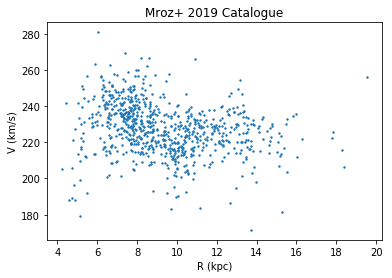

In [3]:
plt.scatter(rs, vs, s=2)
plt.xlabel('R (kpc)')
plt.ylabel('V (km/s)')
plt.title('Mroz+ 2019 Catalogue')

Text(0.5, 1.0, 'Mroz+ 2019 Catalogue')

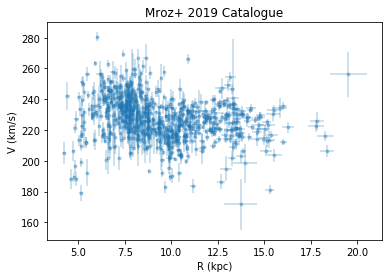

In [4]:
plt.errorbar(rs, vs, yerr=verrs, xerr=rerrs, fmt='.', alpha=.3)
plt.xlabel('R (kpc)')
plt.ylabel('V (km/s)')
plt.title('Mroz+ 2019 Catalogue')

In [5]:
rs_desired = np.arange(12,17.5,1)

In [6]:
idxs = np.array([np.argmin(abs(rs - rd)) for rd in rs_desired])
idxs

array([134, 186, 502, 216, 107, 127])

<ErrorbarContainer object of 3 artists>

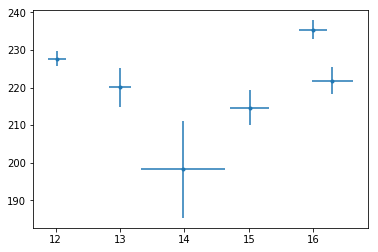

In [7]:
plt.errorbar(rs[idxs], vs[idxs], yerr=verrs[idxs], xerr=rerrs[idxs], fmt='.')

array([[ 12.025,  13.003,  13.978,  15.015,  15.993,  16.296],
       [227.71 , 220.12 , 198.25 , 214.69 , 235.43 , 221.86 ],
       [  2.01 ,   5.2  ,  12.95 ,   4.63 ,   2.49 ,   3.58 ]])

In [12]:
np.savetxt('survey_files/mroz_selection.txt', np.array([rs[idxs], vs[idxs], verrs[idxs]]).T)